In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

data_uni_2 = pd.read_csv("data_uni.csv")

data_uni_2.iloc[:, [24,25,29]]= data_uni_2.iloc[:, [24,25,29]].fillna(0)
column_miss= list(data_uni_2.columns[data_uni_2.isnull().any()])

# IMPUTER ===========================================================================

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_uni_2[column_miss]= imputer.fit_transform(data_uni_2[column_miss])

data_uni_2= data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3", "Overall AWM", "Progression", "Attendance"], axis = 1)

# FORMATING MANUALLY ================================================================

#ethinicty binarisation 
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(5, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(4, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(3, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

#splitting X and y ==================================================================
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)

In [3]:
#Test 3
from pycaret.classification import *
classify_3 = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, log_profile= True, fix_imbalance= False, feature_selection = True, session_id= 4670, pca= False, pca_components=0.9, numeric_features=["First Sit", "Fails","No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

,Description,Value
0,session_id,4670
1,Target,desertion
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1033, 29)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models(include=["rf", "ada","gbc"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9363,0.9566,0.7526,0.8515,0.7942,0.7571,0.7621,0.3620
ada,Ada Boost Classifier,0.9280,0.9384,0.7429,0.8199,0.7691,0.7275,0.7349,0.0430
gbc,Gradient Boosting Classifier,0.9210,0.9515,0.7346,0.7821,0.7518,0.7056,0.7096,0.0550


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4670, verbose=0,
                       warm_start=False)

In [5]:
rf= create_model("rf", cross_validation= True)

rf_results = pull()
rf_scores = rf_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.9945,0.9167,0.9167,0.9167,0.9003,0.9003
1,0.9315,0.9734,0.8333,0.7692,0.8000,0.7588,0.7596
2,0.9452,0.9449,0.6923,1.0000,0.8182,0.7872,0.8056
3,0.9583,0.9861,0.8333,0.9091,0.8696,0.8448,0.8460
4,0.8889,0.8743,0.5000,0.7500,0.6000,0.5385,0.5534
5,0.9167,0.9507,0.7500,0.7500,0.7500,0.7000,0.7000
6,0.9444,0.9403,0.7500,0.9000,0.8182,0.7857,0.7903
7,0.9583,0.9639,0.8333,0.9091,0.8696,0.8448,0.8460
8,0.9444,0.9792,0.8333,0.8333,0.8333,0.8000,0.8000


In [6]:
rf_test= create_model("rf", cross_validation= False)
rf_test_results = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9387,0.9289,0.7568,0.7368,0.7467,0.7118,0.7119


In [7]:
tuned_rf= tune_model(rf, optimize = "Recall")
tuned_rf_results = pull()
tuned_rf_scores = tuned_rf_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9891,0.9167,0.8462,0.8800,0.8553,0.8563
1,0.9178,0.9686,0.9167,0.6875,0.7857,0.7361,0.7478
2,0.9452,0.9513,0.8462,0.8462,0.8462,0.8128,0.8128
3,0.9444,0.9819,0.9167,0.7857,0.8462,0.8125,0.8161
4,0.8611,0.8958,0.5833,0.5833,0.5833,0.5000,0.5000
5,0.8750,0.9597,0.9167,0.5789,0.7097,0.6351,0.6624
6,0.9306,0.9597,0.7500,0.8182,0.7826,0.7414,0.7424
7,0.9028,0.9403,0.8333,0.6667,0.7407,0.6818,0.6882
8,0.9167,0.9750,0.9167,0.6875,0.7857,0.7353,0.7470


In [8]:
final_rf= calibrate_model(tuned_rf)
final_rf_results= pull()
final_rf_scores = final_rf_results.loc[["Mean"]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9877,0.8333,0.9091,0.8696,0.8452,0.8464
1,0.9178,0.9672,0.8333,0.7143,0.7692,0.7196,0.7228
2,0.9315,0.9513,0.6923,0.9000,0.7826,0.7428,0.7518
3,0.9722,0.9833,0.9167,0.9167,0.9167,0.9000,0.9000
4,0.8750,0.9083,0.5000,0.6667,0.5714,0.5000,0.5071
5,0.8889,0.9556,0.8333,0.6250,0.7143,0.6471,0.6574
6,0.9444,0.9653,0.7500,0.9000,0.8182,0.7857,0.7903
7,0.9167,0.9361,0.7500,0.7500,0.7500,0.7000,0.7000
8,0.9306,0.9764,0.7500,0.8182,0.7826,0.7414,0.7424


In [9]:
predict_model(final_rf)
result_pred_rf= pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9355,0.9248,0.7568,0.7179,0.7368,0.7001,0.7004


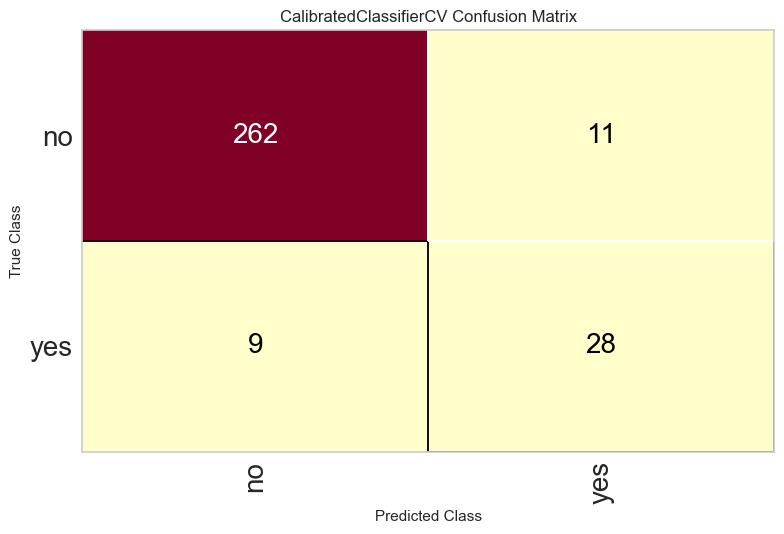

In [10]:
plot_model(final_rf, plot ="confusion_matrix", plot_kwargs = {"fontsize":20,"cmap":'YlOrRd'})

In [11]:
evaluate_model(final_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
gbc_test = create_model("gbc",cross_validation= False)
gbc_test_results= pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9323,0.9406,0.7838,0.6905,0.7342,0.6955,0.6974


In [13]:
gbc = create_model("gbc",cross_validation= True)
gbc_results= pull()
gbc_scores =gbc_results.loc[["Mean"]] 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9918,0.8333,0.9091,0.8696,0.8452,0.8464
1,0.9452,0.9699,0.8333,0.8333,0.8333,0.8005,0.8005
2,0.9452,0.9564,0.8462,0.8462,0.8462,0.8128,0.8128
3,0.9583,0.9889,0.8333,0.9091,0.8696,0.8448,0.8460
4,0.8611,0.8917,0.4167,0.6250,0.5000,0.4231,0.4348
5,0.8889,0.9389,0.7500,0.6429,0.6923,0.6250,0.6278
6,0.9306,0.9333,0.6667,0.8889,0.7619,0.7222,0.7325
7,0.9444,0.9208,0.8333,0.8333,0.8333,0.8000,0.8000
8,0.9028,0.9681,0.8333,0.6667,0.7407,0.6818,0.6882


In [14]:
tuned_gbc= tune_model(gbc, optimize = "Recall")
tuned_gbc_results = pull()
tuned_gbc_scores = tuned_gbc_results.loc[["Mean"]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9726,0.9877,0.9167,0.9167,0.9167,0.9003,0.9003
1,0.9315,0.9781,0.8333,0.7692,0.8000,0.7588,0.7596
2,0.9178,0.9551,0.6154,0.8889,0.7273,0.6808,0.6967
3,0.9722,0.9889,0.9167,0.9167,0.9167,0.9000,0.9000
4,0.8750,0.8722,0.5000,0.6667,0.5714,0.5000,0.5071
5,0.9028,0.9500,0.7500,0.6923,0.7200,0.6613,0.6621
6,0.9306,0.9333,0.6667,0.8889,0.7619,0.7222,0.7325
7,0.9583,0.9208,0.8333,0.9091,0.8696,0.8448,0.8460
8,0.9306,0.9750,0.7500,0.8182,0.7826,0.7414,0.7424


In [15]:
final_gbc = calibrate_model(tuned_gbc)
final_gbc_results= pull()
final_gbc_scores = final_gbc_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9452,0.9918,0.7500,0.9000,0.8182,0.7862,0.7908
1,0.9452,0.9686,0.8333,0.8333,0.8333,0.8005,0.8005
2,0.9315,0.9551,0.6923,0.9000,0.7826,0.7428,0.7518
3,0.9583,0.9903,0.8333,0.9091,0.8696,0.8448,0.8460
4,0.8750,0.9139,0.4167,0.7143,0.5263,0.4600,0.4822
5,0.9167,0.9569,0.7500,0.7500,0.7500,0.7000,0.7000
6,0.9306,0.9542,0.6667,0.8889,0.7619,0.7222,0.7325
7,0.9722,0.9222,0.8333,1.0000,0.9091,0.8929,0.8980
8,0.9167,0.9792,0.7500,0.7500,0.7500,0.7000,0.7000


In [16]:
predict_model(final_gbc)
result_pred_gbc = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9452,0.9413,0.7297,0.7941,0.7606,0.7297,0.7305


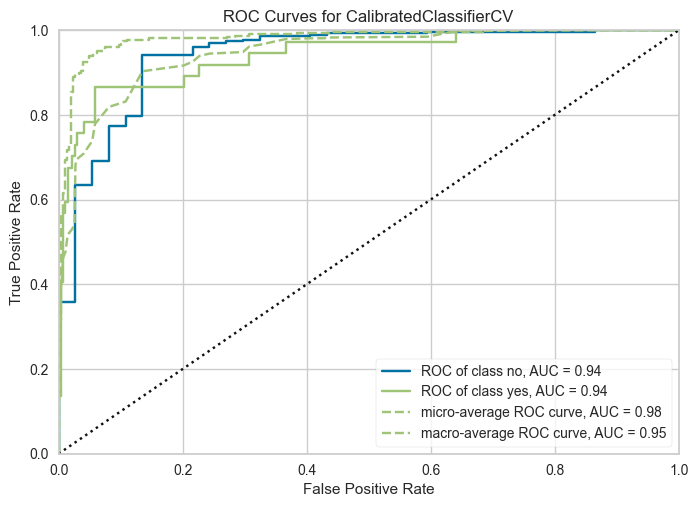

In [17]:
plot_model(final_gbc, plot ="auc")

In [18]:
evaluate_model(final_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
ada_test = create_model("ada",cross_validation= False)
ada_test_results= pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9484,0.9394,0.7568,0.8,0.7778,0.7486,0.749


In [20]:
ada= create_model("ada",cross_validation= True)
ada_results= pull()
ada_scores =ada_results.loc[["Mean"]] 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9452,0.9795,0.7500,0.9000,0.8182,0.7862,0.7908
1,0.9589,0.9542,0.8333,0.9091,0.8696,0.8452,0.8464
2,0.9315,0.9179,0.8462,0.7857,0.8148,0.7729,0.7737
3,0.9583,0.9736,0.8333,0.9091,0.8696,0.8448,0.8460
4,0.8889,0.8542,0.4167,0.8333,0.5556,0.5000,0.5394
5,0.9028,0.9514,0.7500,0.6923,0.7200,0.6613,0.6621
6,0.9306,0.9597,0.6667,0.8889,0.7619,0.7222,0.7325
7,0.9306,0.9028,0.8333,0.7692,0.8000,0.7581,0.7590
8,0.9306,0.9694,0.9167,0.7333,0.8148,0.7727,0.7800


In [21]:
tuned_ada = tune_model(ada, optimize = "Recall")
tune_ada_results = pull()
tune_ada_scores = tune_ada_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9085,0.8333,0.9091,0.8696,0.8452,0.8464
1,0.8904,0.8675,0.8333,0.6250,0.7143,0.6482,0.6585
2,0.9041,0.8513,0.7692,0.7143,0.7407,0.6820,0.6827
3,0.9306,0.8917,0.8333,0.7692,0.8000,0.7581,0.7590
4,0.8611,0.7500,0.5833,0.5833,0.5833,0.5000,0.5000
5,0.8750,0.8583,0.8333,0.5882,0.6897,0.6143,0.6289
6,0.9167,0.8500,0.7500,0.7500,0.7500,0.7000,0.7000
7,0.8611,0.7833,0.6667,0.5714,0.6154,0.5312,0.5336
8,0.8750,0.7917,0.6667,0.6154,0.6400,0.5645,0.5652


In [22]:
final_ada = calibrate_model(tuned_ada)
final_ada_results= pull()
final_ada_scores = final_ada_results.loc[["Mean"]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9589,0.9085,0.8333,0.9091,0.8696,0.8452,0.8464
1,0.8904,0.8675,0.8333,0.6250,0.7143,0.6482,0.6585
2,0.9041,0.8513,0.7692,0.7143,0.7407,0.6820,0.6827
3,0.9306,0.8917,0.8333,0.7692,0.8000,0.7581,0.7590
4,0.8611,0.7500,0.5833,0.5833,0.5833,0.5000,0.5000
5,0.8750,0.8583,0.8333,0.5882,0.6897,0.6143,0.6289
6,0.9167,0.8500,0.7500,0.7500,0.7500,0.7000,0.7000
7,0.8611,0.7833,0.6667,0.5714,0.6154,0.5312,0.5336
8,0.8750,0.7917,0.6667,0.6154,0.6400,0.5645,0.5652


In [23]:
predict_model(final_ada)
result_pred_ada = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8903,0.8092,0.7027,0.5306,0.6047,0.5424,0.5496


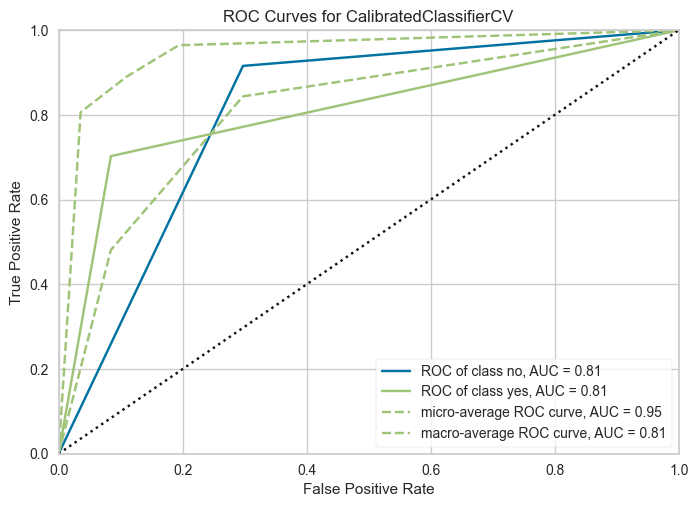

In [24]:
plot_model(final_ada, plot ="auc")

In [25]:
evaluate_model(final_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
resup = pd.concat([result_pred_ada, result_pred_gbc, result_pred_rf])
resup

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8903,0.8092,0.7027,0.5306,0.6047,0.5424,0.5496
0,Gradient Boosting Classifier,0.9452,0.9413,0.7297,0.7941,0.7606,0.7297,0.7305
0,Random Forest Classifier,0.9355,0.9248,0.7568,0.7179,0.7368,0.7001,0.7004


In [27]:
resum= pd.concat([ada_scores, gbc_scores,  rf_scores, ada_test_results,gbc_test_results,rf_test_results], axis =0)
resum.index = ["AdaBoost_2_CV", "Gradient Boosting_2_CV", "Random Forest_2_CV", "AdaBoost_2_Test", "Gradient Boosting_2_Test", "Random Forest_2_Test"]
resum   

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
AdaBoost_2_CV,0.9280,0.9384,0.7429,0.8199,0.7691,0.7275,0.7349
Gradient Boosting_2_CV,0.9210,0.9515,0.7346,0.7821,0.7518,0.7056,0.7096
Random Forest_2_CV,0.9363,0.9566,0.7526,0.8515,0.7942,0.7571,0.7621
AdaBoost_2_Test,0.9484,0.9394,0.7568,0.8000,0.7778,0.7486,0.7490
Gradient Boosting_2_Test,0.9323,0.9406,0.7838,0.6905,0.7342,0.6955,0.6974
Random Forest_2_Test,0.9387,0.9289,0.7568,0.7368,0.7467,0.7118,0.7119


In [29]:
resum_2 = pd.concat([ tune_ada_scores, tuned_gbc_scores, tuned_rf_scores, final_ada_scores, final_gbc_scores, final_rf_scores,  ], axis=0)                
resum_2.index = ["AdaBoost_2_Tunned", "Gradient Boosting_2_Tunned", "Random Forest_2_Tunned", "AdaBoost_2_Final", "Gradient Boosting_2_Final", "Random Forest_2_Final"]
resum_2

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
AdaBoost_2_Tunned,0.8934,0.8302,0.7353,0.6709,0.6986,0.6344,0.6374
Gradient Boosting_2_Tunned,0.9294,0.9504,0.7365,0.8244,0.7733,0.7321,0.7366
Random Forest_2_Tunned,0.9141,0.9558,0.8263,0.7167,0.7627,0.7110,0.7173
AdaBoost_2_Final,0.8934,0.8302,0.7353,0.6709,0.6986,0.6344,0.6374
Gradient Boosting_2_Final,0.9322,0.9592,0.7109,0.8646,0.7738,0.7349,0.7436
Random Forest_2_Final,0.9225,0.9565,0.7442,0.7900,0.7611,0.7153,0.7193
